In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  scipy.stats as st

In [2]:
#load the csv file
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
platform_num = df.iloc[:,7:9].sum()
platform_list = platform_num.index
platform_list
platform_num

Netflix    3560
Hulu        903
dtype: int64

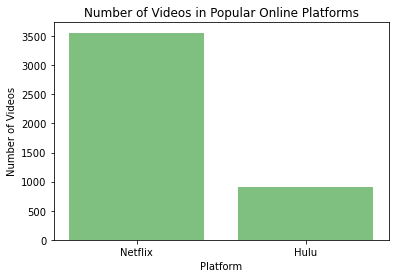

In [52]:
plt.bar(platform_num.index,list(platform_num),color = 'green',alpha = 0.5)
plt.xlabel('Platform')
plt.ylabel('Number of Videos')
plt.title('Number of Videos in Popular Online Platforms')
plt.savefig('nh_output/num.png')
plt.show()

In [5]:
imdb_df = df.dropna(how='any',subset=['IMDb'])

The aveage IMDb score in Hulu is 6.14
The aveage IMDb score in Netflix is 6.25
p value =0.00673


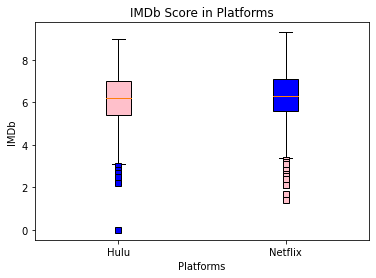

In [34]:
imdb_df = df.dropna(how='any',subset=['IMDb'])
platform_list=['Hulu','Netflix']
t_test=[]
colors = ['pink','blue']
i=0
for platform in platform_list:
    filt = (imdb_df[platform]==1)
    IMDb_list = list(imdb_df['IMDb'].loc[filt])
    ave_IMDb = round(imdb_df['IMDb'].loc[filt].mean(),2)
    print(f'The aveage IMDb score in {platform} is {ave_IMDb}')
    t_test.append(IMDb_list)
    plt.boxplot(IMDb_list,positions = [i],flierprops=dict(markerfacecolor=colors[i-1], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
#     annotation='Ave score: '+str(ave_IMDb)
#     plt.annotate(annotation,(i-0.2,7.5),size =12)
    i = i+1
p_value = round(st.ttest_ind(t_test[0], t_test[1], equal_var=False)[1],5)
print(f'p value ={p_value}')
x_axis = np.arange(len(platform_list))
tick_locations = [value for value in x_axis]
# annotation_p = "p value: " + str(p_value)
# plt.annotate(annotation_p,(0.3,2),size =12)
plt.xticks(tick_locations, platform_list)
plt.xlabel('Platforms')
plt.ylabel('IMDb')
plt.title(f'IMDb Score in Platforms')
plt.savefig('nh_output/IMDB.png')
plt.show()

In [29]:
rt_df = df.dropna(how='any',subset=['Rotten Tomatoes'])
rt_df['Rotten Tomatoes'] = rt_df['Rotten Tomatoes'].apply(lambda x: x.strip("%")).astype(float)
rt_df

<ipython-input-29-15d1e6900a1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_df['Rotten Tomatoes'] = rt_df['Rotten Tomatoes'].apply(lambda x: x.strip("%")).astype(float)


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17.0,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13.0,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16687,16688,Kazaam,1996,7+,3.0,6.0,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7.0,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


The aveage IMDb score in Hulu is 66.87
The aveage IMDb score in Netflix is 66.2
p value =0.59042


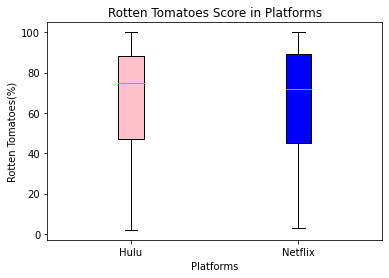

In [35]:
platform_list=['Hulu','Netflix']
t_test=[]
colors = ['pink','blue']
i=0
for platform in platform_list:
    filt = (rt_df[platform]==1)
    IMDb_list = list(rt_df['Rotten Tomatoes'].loc[filt])
    ave_IMDb = round(rt_df['Rotten Tomatoes'].loc[filt].mean(),2)
    print(f'The aveage IMDb score in {platform} is {ave_IMDb}')
    t_test.append(IMDb_list)
    plt.boxplot(IMDb_list,positions = [i],flierprops=dict(markerfacecolor=colors[i-1], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
#     annotation='Ave score: '+str(ave_IMDb)
#     plt.annotate(annotation,(i-0.2,7.5),size =12)
    i = i+1
p_value = round(st.ttest_ind(t_test[0], t_test[1], equal_var=False)[1],5)
print(f'p value ={p_value}')
x_axis = np.arange(len(platform_list))
tick_locations = [value for value in x_axis]
# annotation_p = "p value: " + str(p_value)
# plt.annotate(annotation_p,(0.3,2),size =12)
plt.xticks(tick_locations, platform_list)
plt.xlabel('Platforms')
plt.ylabel('Rotten Tomatoes(%)')
plt.title(f'Rotten Tomatoes Score in Platforms')
plt.savefig('nh_output/RT.png')
plt.show()

In [10]:
score_df = df[['IMDb','Rotten Tomatoes']].dropna(how='any')
score_df['Rotten Tomatoes'] = score_df['Rotten Tomatoes'].apply(lambda x: x.strip("%")).astype(float)
score_df

,IMDb,Rotten Tomatoes
0,8.8,87.0
1,8.7,87.0
2,8.5,84.0
3,8.5,96.0
4,8.8,97.0
...,...,...
16671,3.3,17.0
16677,4.7,13.0
16687,3.0,6.0
16705,4.1,7.0


the correlation (r) value  for two socre systems is 0.6163204883344221


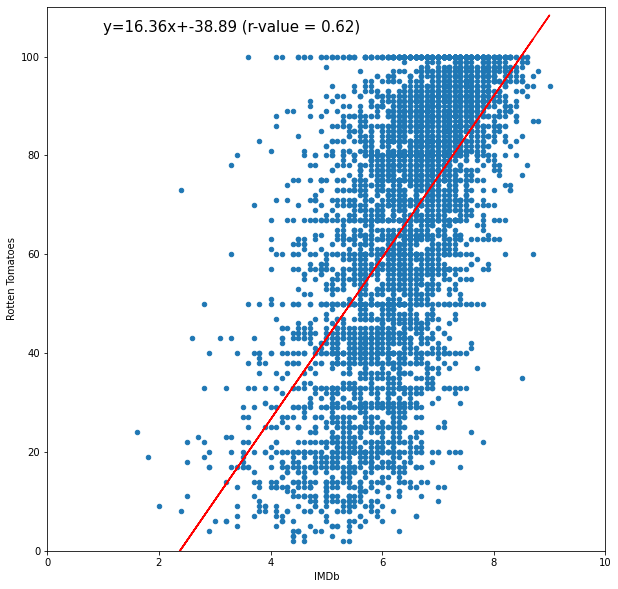

In [37]:
score_df.plot.scatter('IMDb','Rotten Tomatoes',figsize=(10,10))
x_values = score_df['IMDb']
y_values = score_df['Rotten Tomatoes']
(m,b,r,p,sem) = st.linregress(x_values, y_values)
regress_values = m*x_values+b
plt.plot(x_values,regress_values,'r-')
print(f'the correlation (r) value  for two socre systems is {r}')
line = f'y={round(m,2)}x+{round(b,2)} (r-value = {round(r,2)})'
plt.xlim(0,10)
plt.ylim(0,110)
plt.annotate(line,(1,105),fontsize=15)
plt.savefig('nh_output/RT_IMDb.png')
plt.show()

In [12]:
clean_lang_df = df.dropna(subset=['Language'], how='any')
clean_lang_df
english_num = []
lang_total_df = pd.DataFrame()
platform_list = ['Netflix','Hulu']
for platform in platform_list:
    ds = clean_lang_df['Language'].loc[clean_lang_df[platform]==1]
    language_list = list(ds)
    language_splitted_list = []
    for item in language_list:
        x = item.split(',')
        for i in x: 
            language_splitted_list.append(i)
            num= pd.DataFrame({'language':language_splitted_list})['language'].value_counts()[0]
    english_num.append(num)
english_num  

[2264, 815]

In [13]:
platform_num = df[['Netflix','Hulu']].sum()
english_num_pct = np.array(english_num)/np.array(platform_num)
english_num_pct = ["{:.1%}".format(number) for number in english_num_pct]
english_num_pct

['63.6%', '90.3%']

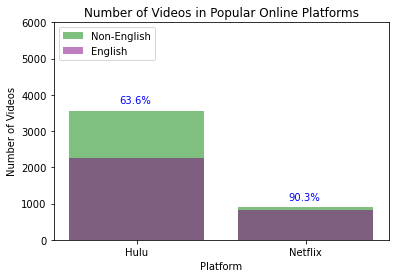

In [53]:
plt.bar(platform_list,list(platform_num),color = 'green',alpha = 0.5,label='Non-English')
plt.bar(platform_list,english_num,color = 'purple',alpha = 0.5,label='English')
plt.xlabel('Platform')
plt.ylabel('Number of Videos')
plt.legend(loc ='upper left')
plt.title('Number of Videos in Popular Online Platforms')
for i in range(2):
    plt.annotate(english_num_pct[i],(-0.1+i,platform_num[i]+200),color='blue')
plt.ylim(0,6000)
plt.savefig('nh_output/english.png')
plt.show()

The aveage IMDb score in Hulu is 6.09
The aveage IMDb score in Netflix is 6.26
p value =0.00022


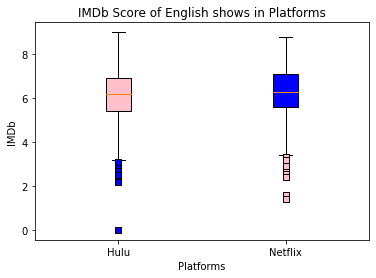

In [50]:
imdb_df = df.dropna(how='any',subset=['IMDb'])
platform_list=['Hulu','Netflix']
t_test=[]
colors = ['pink','blue']
i=0
for platform in platform_list:
    filt = (imdb_df[platform]==1)&(imdb_df['Language'].str.contains('English'))
    IMDb_list = list(imdb_df['IMDb'].loc[filt])
    ave_IMDb = round(imdb_df['IMDb'].loc[filt].mean(),2)
    print(f'The aveage IMDb score in {platform} is {ave_IMDb}')
    t_test.append(IMDb_list)
    plt.boxplot(IMDb_list,positions = [i],flierprops=dict(markerfacecolor=colors[i-1], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
#     annotation='Ave score: '+str(ave_IMDb)
#     plt.annotate(annotation,(i-0.2,7.5),size =12)
    i = i+1
p_value = round(st.ttest_ind(t_test[0], t_test[1], equal_var=False)[1],5)
print(f'p value ={p_value}')
x_axis = np.arange(len(platform_list))
tick_locations = [value for value in x_axis]
# annotation_p = "p value: " + str(p_value)
# plt.annotate(annotation_p,(0.3,2),size =12)
plt.xticks(tick_locations, platform_list)
plt.xlabel('Platforms')
plt.ylabel('IMDb')
plt.title(f'IMDb Score of English shows in Platforms')
plt.show()

In [16]:
clean_country_df = df.dropna(subset=['Country'], how='any')
clean_country_df
us_num = []
country_total_df = pd.DataFrame()
platform_list = ['Netflix','Hulu']
for platform in platform_list:
    ds = clean_country_df['Country'].loc[clean_country_df[platform]==1]
    country_list = list(ds)
    country_splitted_list = []
    for item in country_list:
        x = item.split(',')
        for i in x: 
            country_splitted_list.append(i)
            num= pd.DataFrame({'Country':country_splitted_list})['Country'].value_counts()[0]
    us_num.append(num)
us_num

[1700, 668]

In [17]:
platform_num = df[['Netflix','Hulu']].sum()
us_num_pct = np.array(us_num)/np.array(platform_num)
us_num_pct = ["{:.1%}".format(number) for number in us_num_pct]
us_num_pct

['47.8%', '74.0%']

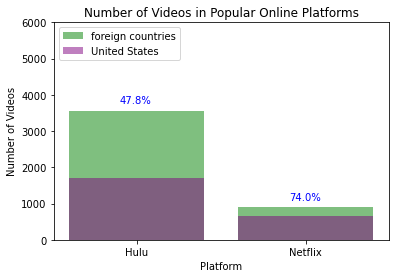

In [54]:
plt.bar(platform_list,list(platform_num),color = 'green',alpha = 0.5,label='foreign countries')
plt.bar(platform_list,us_num,color = 'purple',alpha = 0.5,label='United States')
plt.xlabel('Platform')
plt.ylabel('Number of Videos')
plt.legend(loc ='upper left')
plt.title('Number of Videos in Popular Online Platforms')
for i in range(2):
    plt.annotate(us_num_pct[i],(-0.1+i,platform_num[i]+200),color='blue')
plt.ylim(0,6000)
plt.savefig('nh_output/country.png')
plt.show()

The aveage IMDb score in Hulu is 6.12
The aveage IMDb score in Netflix is 6.25
p value =0.00567


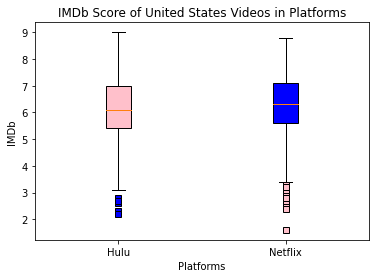

In [55]:
imdb_df = df.dropna(how='any',subset=['IMDb'])
platform_list=['Hulu','Netflix']
t_test=[]
colors = ['pink','blue']
i=0
for platform in platform_list:
    filt = (imdb_df[platform]==1)&(imdb_df['Country'].str.contains('United States'))
    IMDb_list = list(imdb_df['IMDb'].loc[filt])
    ave_IMDb = round(imdb_df['IMDb'].loc[filt].mean(),2)
    print(f'The aveage IMDb score in {platform} is {ave_IMDb}')
    t_test.append(IMDb_list)
    plt.boxplot(IMDb_list,positions = [i],flierprops=dict(markerfacecolor=colors[i-1], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
    i = i+1
p_value = round(st.ttest_ind(t_test[0], t_test[1], equal_var=False)[1],5)
print(f'p value ={p_value}')
x_axis = np.arange(len(platform_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, platform_list)
plt.xlabel('Platforms')
plt.ylabel('IMDb')
plt.title(f'IMDb Score of United States Videos in Platforms')
plt.show()

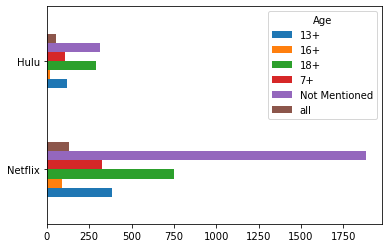

In [56]:

age_df = df.groupby('Age')[platform_list].sum()
nh_age_df = age_df[['Netflix','Hulu']]
nh_age_df.T.plot.barh()
plt.savefig('nh_output/age.png')
plt.show()

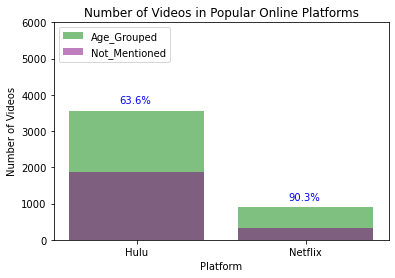

In [57]:
plt.bar(platform_list,list(platform_num),color = 'green',alpha = 0.5,label='Age_Grouped')
plt.bar(platform_list,nh_age_df.T['Not Mentioned'],color = 'purple',alpha = 0.5,label='Not_Mentioned')
plt.xlabel('Platform')
plt.ylabel('Number of Videos')
plt.legend(loc ='upper left')
plt.title('Number of Videos in Popular Online Platforms')
for i in range(2):
    plt.annotate(english_num_pct[i],(-0.1+i,platform_num[i]+200),color='blue')
plt.ylim(0,6000)
plt.savefig('nh_output/age1.png')
plt.show()

In [22]:
nh_age_df2 = nh_age_df.T[['all','7+','13+','16+','18+']]
nh_age_df2 

Age,all,7+,13+,16+,18+
Netflix,130,323,383,89,752
Hulu,55,109,119,17,290


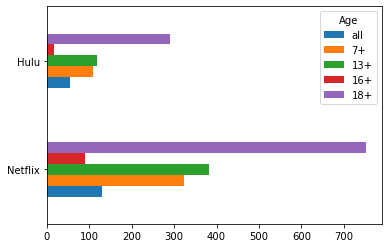

In [23]:
nh_age_df2.plot.barh()
plt.show()

In [24]:
age_n_ds = imdb_df[imdb_df['Netflix']==1].groupby('Age')['IMDb'].median()
age_h_ds = imdb_df[imdb_df['Hulu']==1].groupby('Age')['IMDb'].median()
pd.concat([age_n_ds,age_h_ds],axis=1)

,IMDb,IMDb
Age,,
13+,6.40,6.55
16+,6.50,5.10
18+,6.30,6.20
7+,6.20,6.40
all,6.25,5.80


The aveage IMDb score of 13+ in Hulu is 6.43
The aveage IMDb score of 13+ in Netflix is 6.35
p value =0.45393


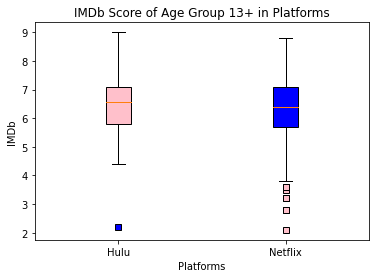

The aveage IMDb score of 16+ in Hulu is 5.41
The aveage IMDb score of 16+ in Netflix is 6.32
p value =0.00948


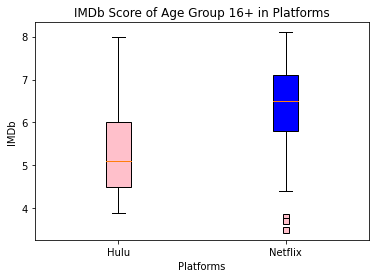

The aveage IMDb score of 18+ in Hulu is 6.18
The aveage IMDb score of 18+ in Netflix is 6.29
p value =0.13859


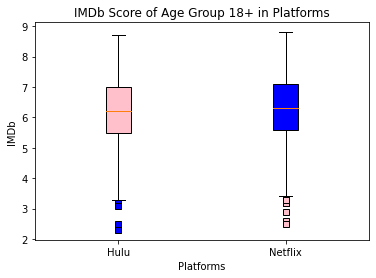

The aveage IMDb score of 7+ in Hulu is 6.29
The aveage IMDb score of 7+ in Netflix is 6.2
p value =0.51041


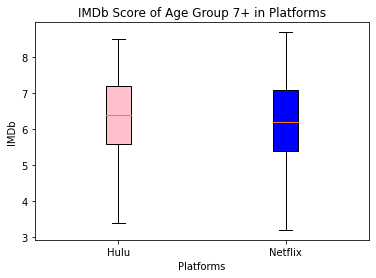

The aveage IMDb score of all in Hulu is 5.91
The aveage IMDb score of all in Netflix is 6.28
p value =0.03465


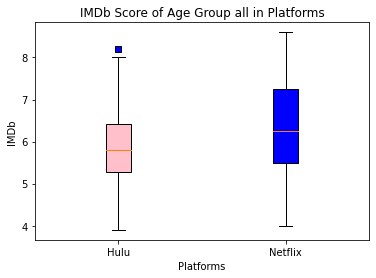

In [25]:
age_list = age_n_ds.index
for age in age_list:
    colors = ['pink','blue']
    IMDb_list = []
    platform_list=['Hulu','Netflix']
    t_test = []
    i=0
    for platform in platform_list:
        filt = (imdb_df[platform]==1)&(imdb_df['Age']==age)
        IMDb_list = list(imdb_df['IMDb'].loc[filt])
        ave_IMDb = round(imdb_df['IMDb'].loc[filt].mean(),2)
        print(f'The aveage IMDb score of {age} in {platform} is {ave_IMDb}')
        t_test.append(IMDb_list)
        plt.boxplot(IMDb_list,positions = [i],flierprops=dict(markerfacecolor=colors[i-1], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
        i = i+1
    p_value = round(st.ttest_ind(t_test[0], t_test[1], equal_var=False)[1],5)
    print(f'p value ={p_value}')
    x_axis = np.arange(len(platform_list))
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, platform_list)
    plt.xlabel('Platforms')
    plt.ylabel('IMDb')
    plt.title(f'IMDb Score of Age Group {age} in Platforms')
    plt.show()

In [26]:
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')